# Importing

In [1]:
#Pip install
!pip install --user --upgrade catboost
!pip install --user --upgrade ipywidgets
!pip install shap
!pip install sklearn
!pip install --upgrade numpy
!jupyter nbextension enable --py widgetsnbextension
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.1/547.1 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=639ae0b99890ee6426ccf8f08c9ee5907745594fe240f2555e9ebaaa2670d4d3
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 61.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does 

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 58.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.1
    Uninstalling numpy-1.25.1:
      Successfully uninstalled numpy-1.25.1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import plotly.express as px


from sklearn.pipeline import Pipeline

#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
import catboost


from sklearn.model_selection import train_test_split
#scoring
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, average_precision_score, roc_auc_score, precision_recall_curve, roc_curve, auc

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import shap



Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


# Data Cleaning / EDA

In [2]:
#Import Dataset
df = pd.read_csv('/bodyPerformance.csv')

In [3]:
#Check Dataset
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [4]:
#Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [5]:
#Check null values
df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [6]:
#Check unique values
df.nunique()

age                          44
gender                        2
height_cm                   467
weight_kg                  1398
body fat_%                  527
diastolic                    89
systolic                    102
gripForce                   550
sit and bend forward_cm     528
sit-ups counts               81
broad jump_cm               245
class                         4
dtype: int64

In [7]:
#Describe daatset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,13393.0,36.775106,13.625639,21.0,25.0,32.0,48.0,64.0
height_cm,13393.0,168.559807,8.426583,125.0,162.4,169.2,174.8,193.8
weight_kg,13393.0,67.447316,11.949666,26.3,58.2,67.4,75.3,138.1
body fat_%,13393.0,23.240165,7.256844,3.0,18.0,22.8,28.0,78.4
diastolic,13393.0,78.796842,10.742033,0.0,71.0,79.0,86.0,156.2
systolic,13393.0,130.234817,14.713954,0.0,120.0,130.0,141.0,201.0
gripForce,13393.0,36.963877,10.624864,0.0,27.5,37.9,45.2,70.5
sit and bend forward_cm,13393.0,15.209268,8.456677,-25.0,10.9,16.2,20.7,213.0
sit-ups counts,13393.0,39.771224,14.276698,0.0,30.0,41.0,50.0,80.0
broad jump_cm,13393.0,190.129627,39.868000,0.0,162.0,193.0,221.0,303.0


In [8]:
#Change features to categorical using label encoder so they can be used for analysis
from sklearn.preprocessing import LabelEncoder
print('Categorical columns: ')
for col in df.columns:
    if df[col].dtype == 'object':
        values = df[col].value_counts()
        values = dict(values)

        print(str(col))
        label = LabelEncoder()
        label = label.fit(df[col])
        df[col] = label.transform(df[col].astype(str))

        new_values = df[col].value_counts()
        new_values = dict(new_values)

        value_dict = {}
        i=0
        for key in values:
            value_dict[key] = list(new_values)[i]
            i+= 1
        print(value_dict)

Categorical columns: 
gender
{'M': 1, 'F': 0}
class
{'C': 2, 'D': 3, 'A': 0, 'B': 1}


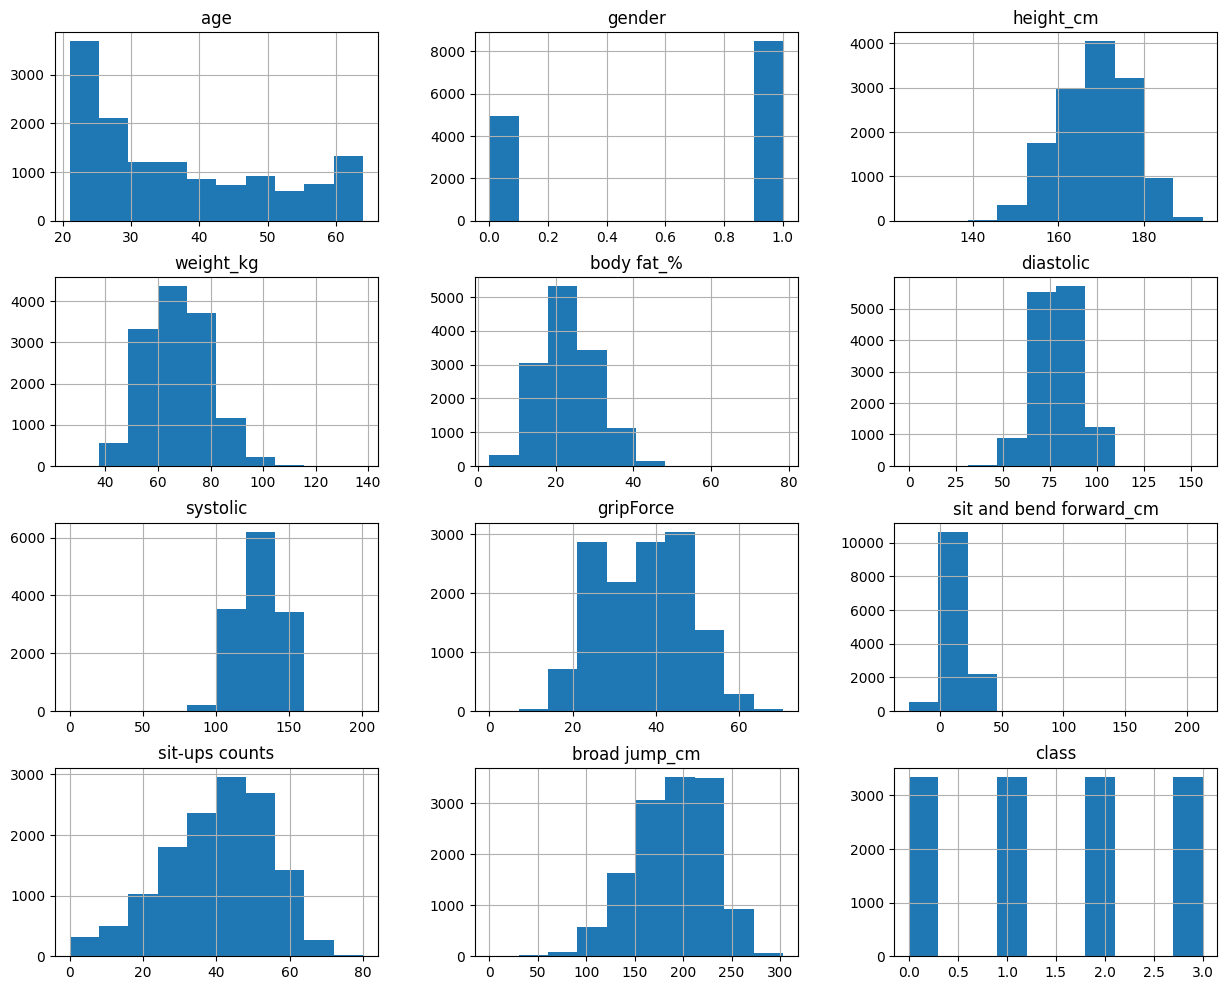

In [9]:
#Plot histogram for each feature to analsyise
hist_plot = df.hist(figsize = (15,12))

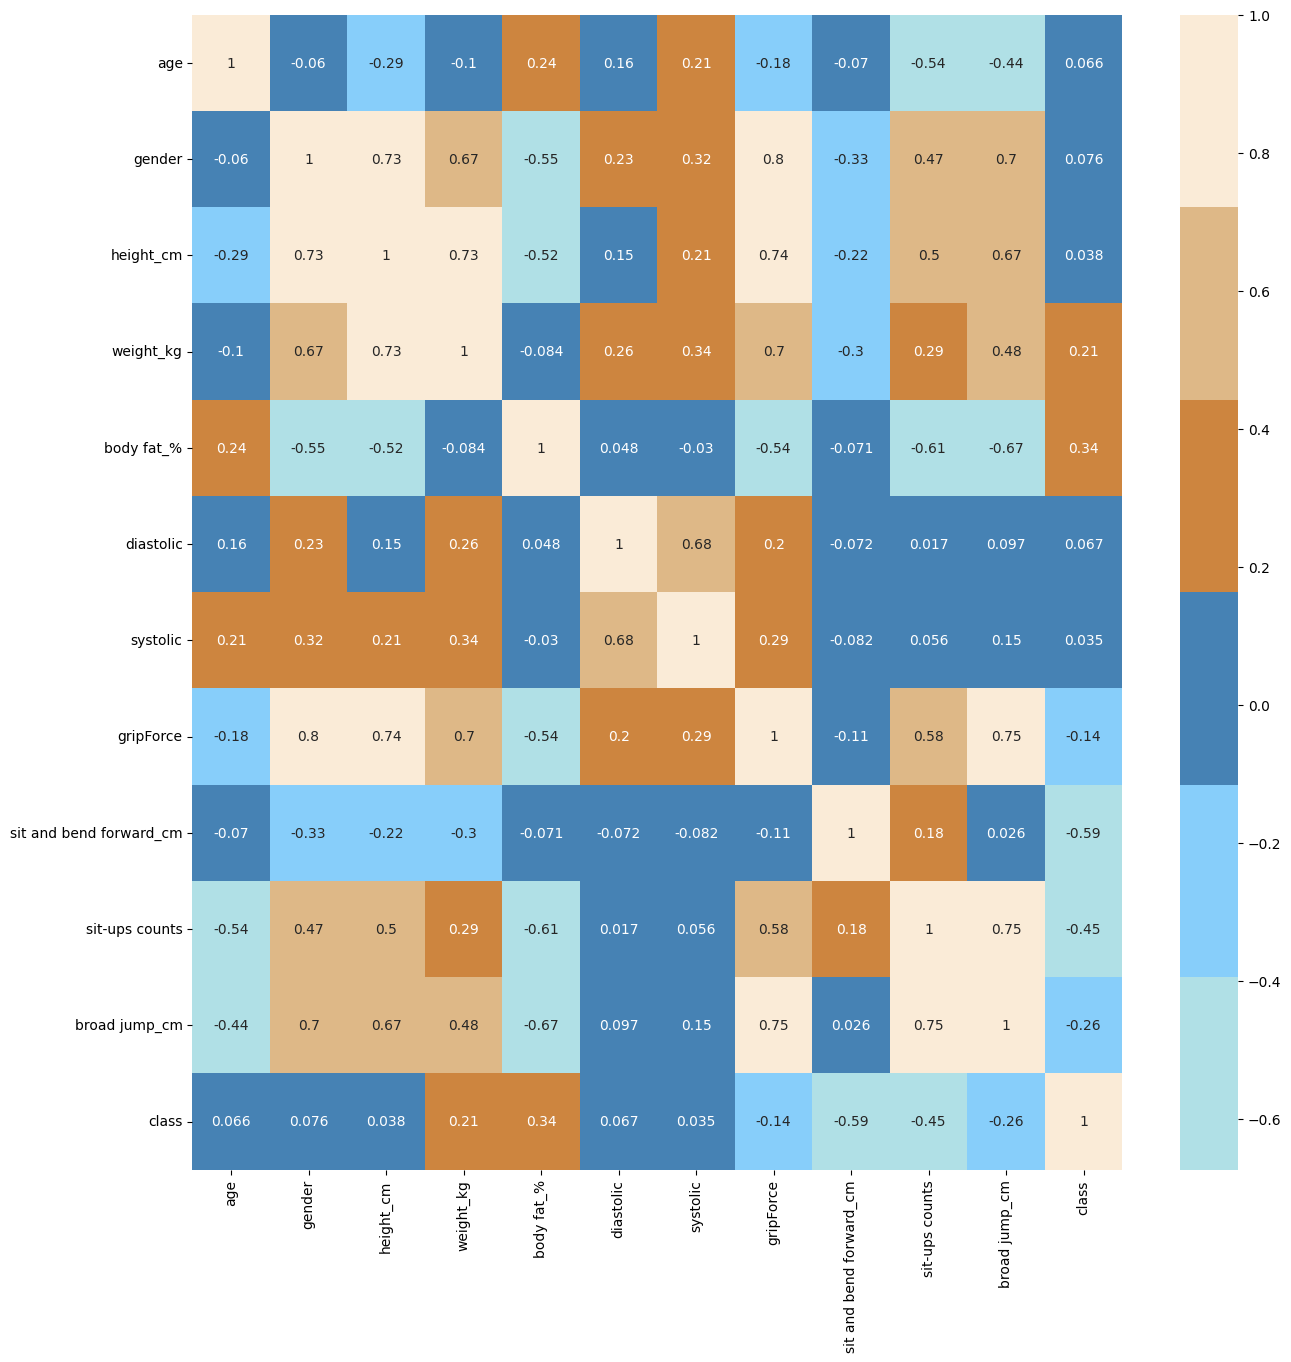

In [10]:
#Create heatmap with correlations
cmap = sns.diverging_palette(205, 133, 63, as_cmap=True)
cols = (["#B0E0E6", "#87CEFA", "#4682B4", "#CD853F", "#DEB887", "#FAEBD7"])

corrmat= df.corr()

f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmat,cmap=cols,annot=True)
plt.show()

In [11]:
#df = df.astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  int64  
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 1.2 MB




`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating you

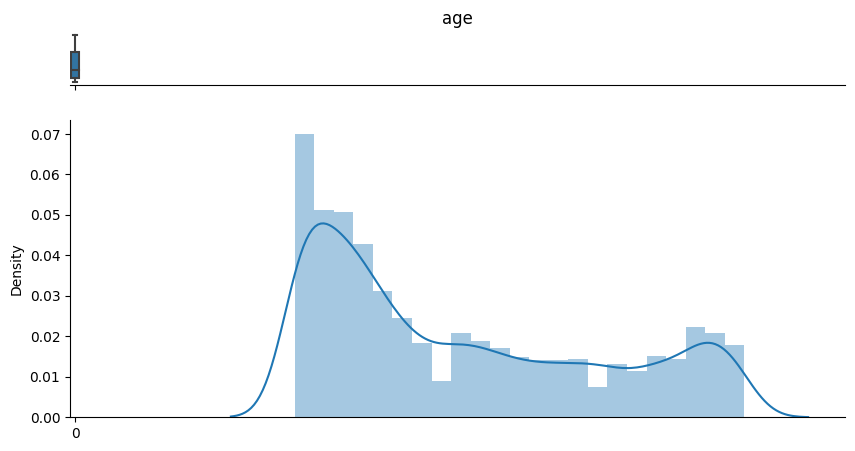

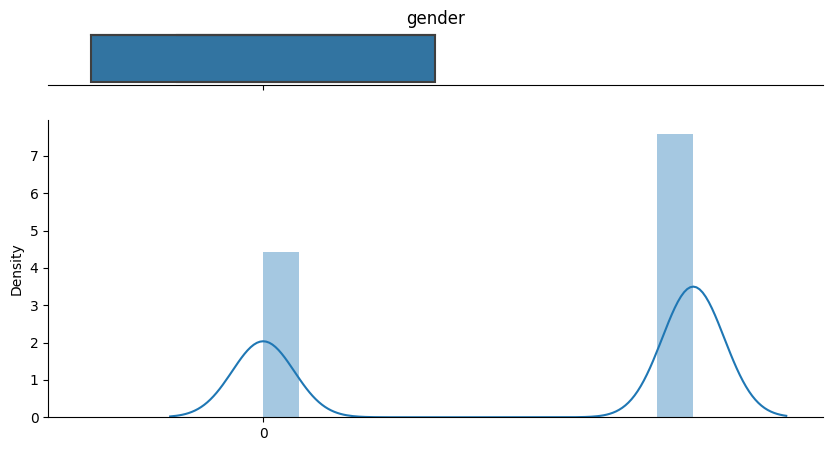

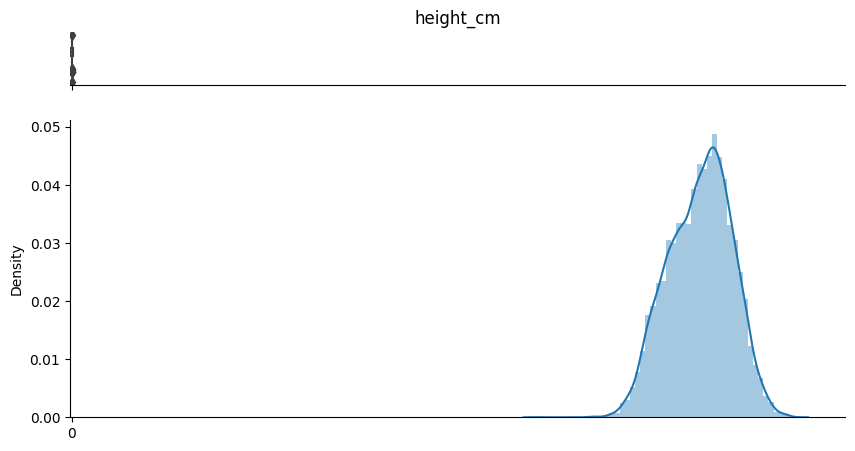

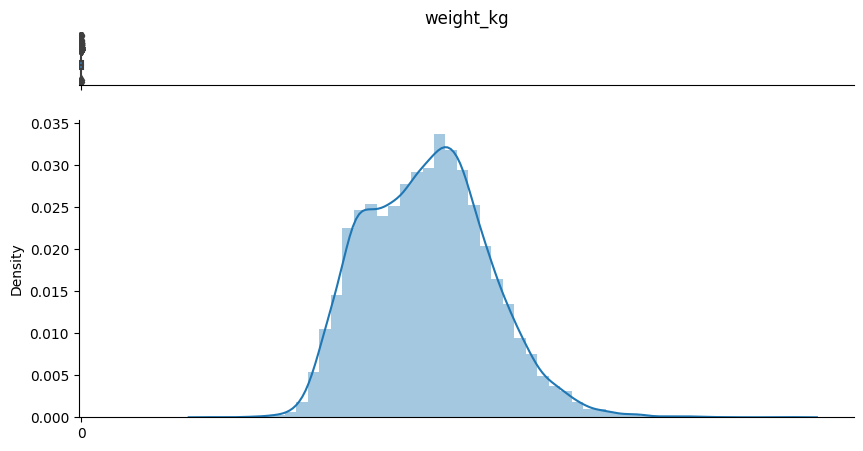

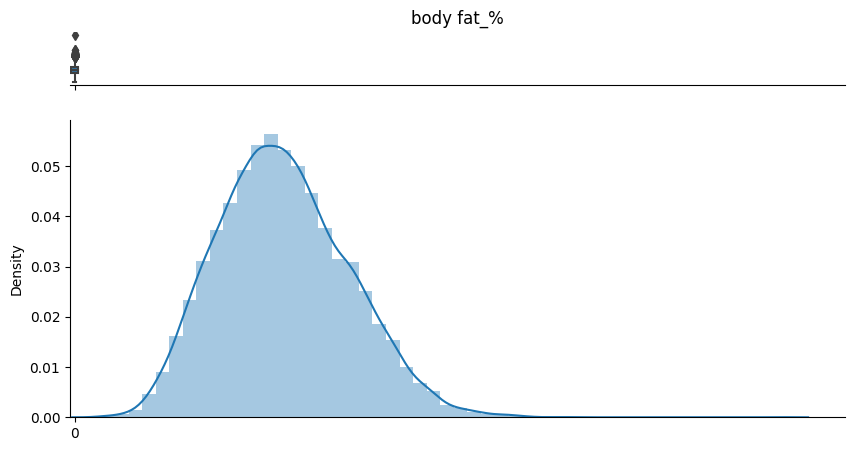

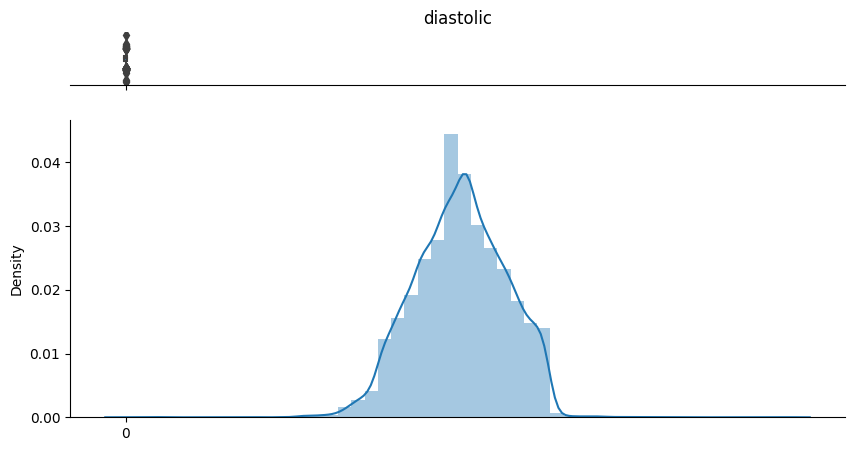

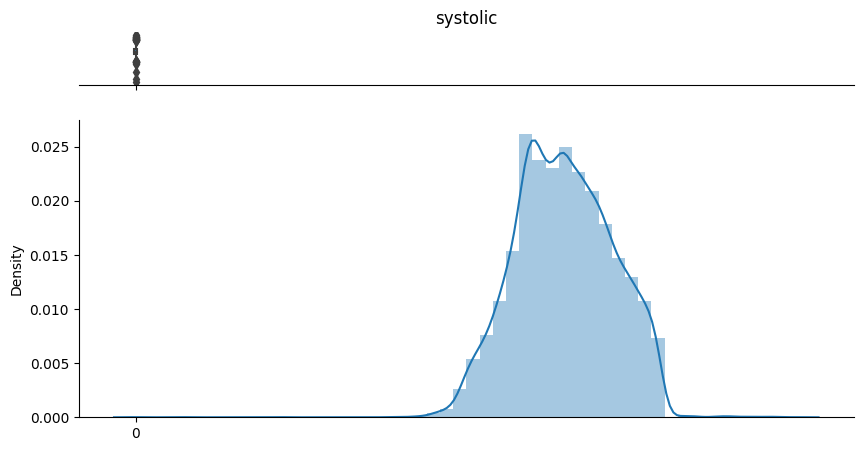

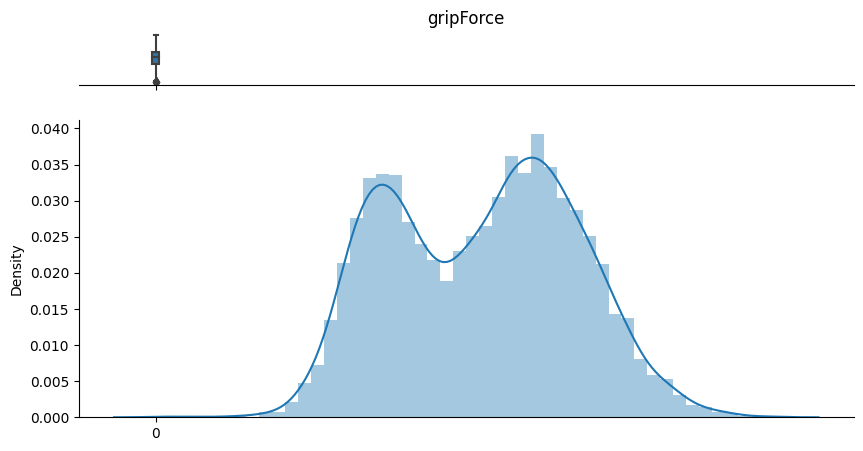

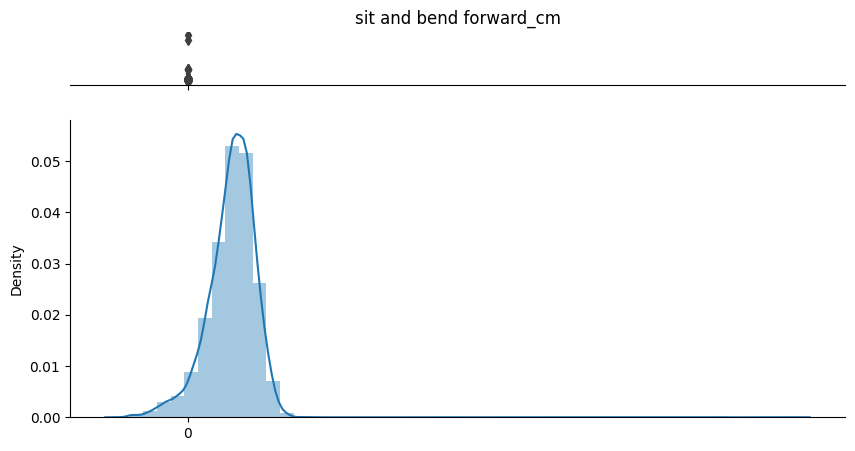

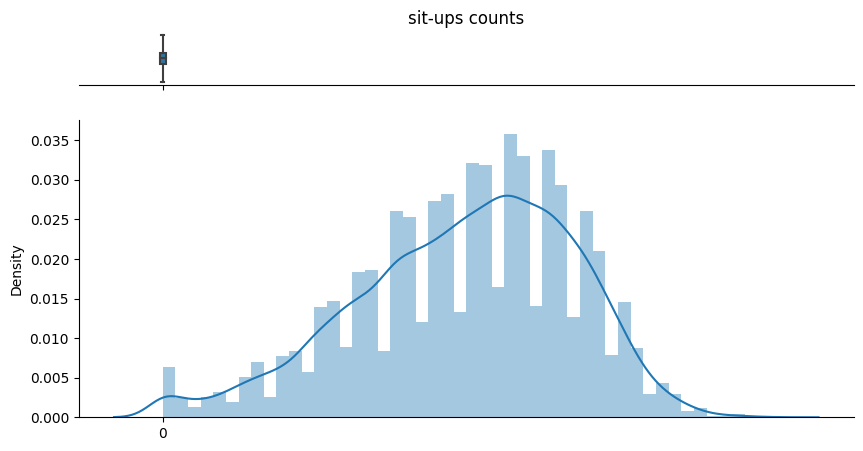

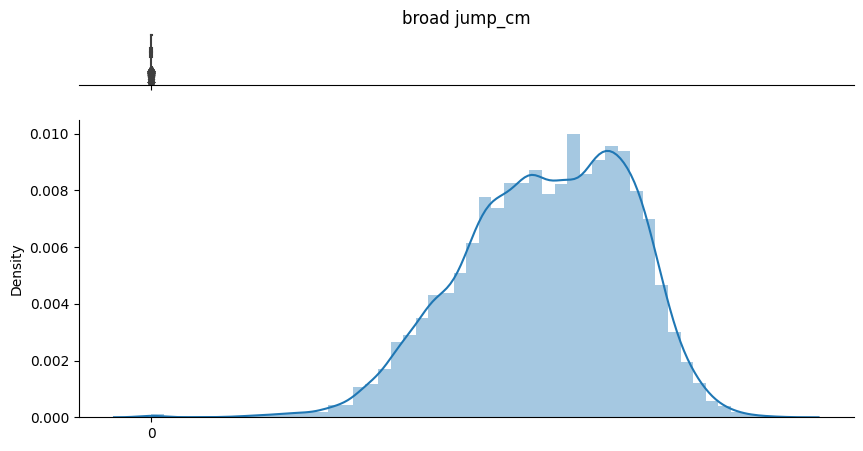

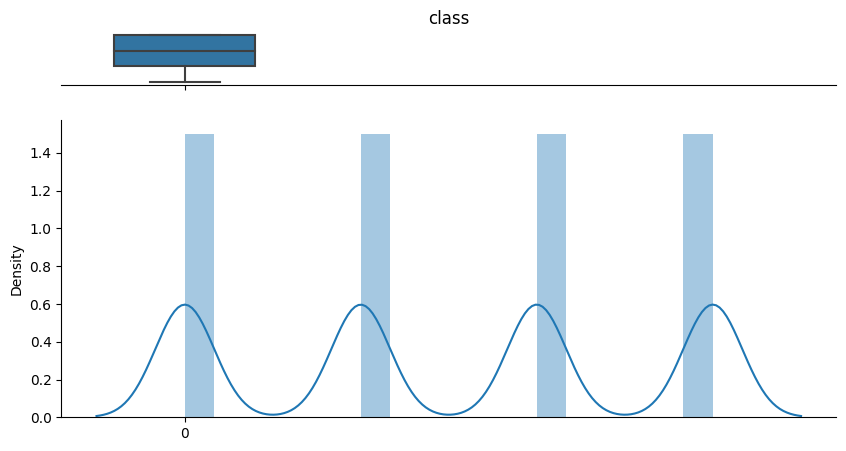

In [13]:
#Histogram for each feature to visualize

for c in df.columns:
    fig, ax = plt.subplots(2,
                           figsize = (10, 5),
                           sharex = True,
                           gridspec_kw = {'height_ratios': (0.15, 0.85)})

    ax_box = ax[0]
    ax_box = sns.boxplot(df[c], ax = ax_box)
    ax_box.set(title = c, yticks = [], xlabel = '')
    sns.despine(ax = ax_box, left = True)

    ax_hist = ax[1]

    if c == '':
        ax_hist = sns.distplot(df[c], kde=False, ax = ax_hist)
        ax_hist.set(xlabel = '')
        sns.despine(ax = ax_hist)
    else:
        ax_hist = sns.distplot(df[c], ax = ax_hist)
        ax_hist.set(xlabel = '')
        sns.despine(ax = ax_hist)


plt.show()

In [14]:
#Numerical skew for each feature
df.skew()

age                        0.599896
gender                    -0.548356
height_cm                 -0.186882
weight_kg                  0.349805
body fat_%                 0.361132
diastolic                 -0.159637
systolic                  -0.048654
gripForce                  0.018456
sit and bend forward_cm    0.785492
sit-ups counts            -0.467830
broad jump_cm             -0.422623
class                     -0.000307
dtype: float64

In [15]:
#remove extreme outleirs for height and wieght

df = df[df['height_cm'] > 130]
df = df[df['weight_kg'] < 120]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13388 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13388 non-null  float64
 1   gender                   13388 non-null  int64  
 2   height_cm                13388 non-null  float64
 3   weight_kg                13388 non-null  float64
 4   body fat_%               13388 non-null  float64
 5   diastolic                13388 non-null  float64
 6   systolic                 13388 non-null  float64
 7   gripForce                13388 non-null  float64
 8   sit and bend forward_cm  13388 non-null  float64
 9   sit-ups counts           13388 non-null  float64
 10  broad jump_cm            13388 non-null  float64
 11  class                    13388 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 1.3 MB


# Test all models

In [16]:
#Create X and y for for dataset and create train text split
X = df.drop('class', axis=1)
y = df[['class']]
y = y.values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=46)

In [17]:
#Build pipeline for models

pipeline_lr = Pipeline([('lr_classifier',LogisticRegression())])

pipeline_dt = Pipeline([('dt_classifier',DecisionTreeClassifier())])

pipeline_gbcl = Pipeline([('gbcl_classifier',GradientBoostingClassifier())])

pipeline_rf = Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_knn = Pipeline([('knn_classifier',KNeighborsClassifier())])

pipeline_bnb = Pipeline([('bnb_classifer',BernoulliNB())])

pipeline_bag = Pipeline([('bag_classifer',BaggingClassifier())])

pipeline_ada = Pipeline([('bnb_classifer',AdaBoostClassifier())])

pipeline_gnb = Pipeline([('gnb_classifer',GaussianNB())])

pipeline_mlp = Pipeline([('mlp_classifer',MLPClassifier())])

pipeline_sgd = Pipeline([('sgd_classifer',SGDClassifier())])

pipeline_xgb = Pipeline([('xgb_classifer',XGBClassifier())])

pipeline_cat = Pipeline([('cat_classifier',CatBoostClassifier(verbose=False))])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_gbcl, pipeline_rf, pipeline_knn, pipeline_bnb, pipeline_bag, pipeline_ada, pipeline_gnb, pipeline_mlp, pipeline_sgd, pipeline_xgb, pipeline_cat]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Gradient Boost', 3:'RandomForest', 4: 'KNN', 5: 'BN', 6:'Bagging', 7:'Ada Boost', 8:'GaussianNB', 9:'MLP Classifier', 10:'SGD Classifier', 11:'XG Boost', 12:'Cat Boost'}


# Fitting the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [18]:
#List all results to determine best model
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=5)
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Logistic Regression: 0.601005 
Decision Tree: 0.628323 
Gradient Boost: 0.711770 
RandomForest: 0.720094 
KNN: 0.555331 
BN: 0.333583 
Bagging: 0.701952 
Ada Boost: 0.594922 
GaussianNB: 0.542419 
MLP Classifier: 0.604207 
SGD Classifier: 0.482333 
XG Boost: 0.739623 
Cat Boost: 0.726070 


In [19]:
#Create final model for catboost
model = CatBoostClassifier(verbose=False)
model.fit(X_train, y_train)

In [20]:
#Print score for model
score = model.score(X_test, y_test)
score

0.7411003236245954

In [21]:
#PLOT ALL SCORES

# Hyperparamter tuning

Grid search

In [22]:
#parameters = {'depth'         : [4,5,6,7,8,9, 10],
              #'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
              #'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
               #  }

In [23]:
#Grid_model = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
#Grid_model.fit(X_train, y_train)

In [24]:
#best_parameters = GridSearchCV_gbcl.best_params_
#print(f"Best parameters for the model:\n{best_parameters}")

# Model Results

In [25]:
#Print scores for Multiclass
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)

print(metrics.classification_report(y_test, y_test_pred, digits=3))
print('Accuracy score: ', accuracy_score(y_test, y_test_pred))
print('Roc auc score : ', roc_auc_score(y_test, y_test_prob, multi_class='ovr'))

              precision    recall  f1-score   support

           0      0.737     0.838     0.784      1005
           1      0.628     0.615     0.621      1042
           2      0.718     0.697     0.707      1005
           3      0.903     0.823     0.861       965

    accuracy                          0.741      4017
   macro avg      0.747     0.743     0.744      4017
weighted avg      0.744     0.741     0.741      4017

Accuracy score:  0.7411003236245954
Roc auc score :  0.9197527582710794


In [26]:
#Create confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)

fig = px.imshow(confusion, labels=dict(x="Predicted Value", y="Actual Vlaue"), x=[1,2,3,4],y=[1,2,3,4],text_auto=True, title='Confusion Matrix')
fig.update_layout(title_x=0.5)
fig.show()

ROC for individual class

In [27]:
#Create label binarizer
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(4017, 4)

In [28]:
#Transfrom array
label_binarizer.transform([0])

array([[1, 0, 0, 0]])

In [29]:
#Choose class to plot
class_of_interest = 0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

0

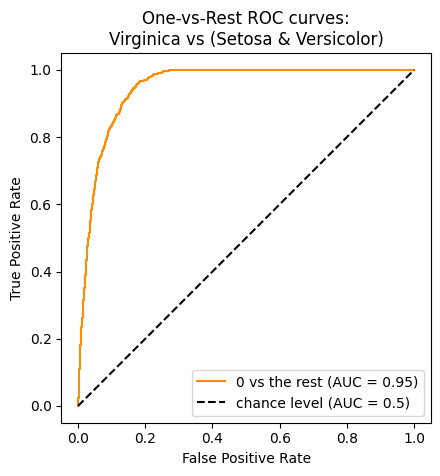

In [30]:
#Plot ROC for chosen class
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_test_prob[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")
plt.legend()
plt.show()

ROC for all classes

In [31]:
# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_test_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.93


In [32]:
#Number of classes and taqrget names
n_classes = len(np.unique(y))
target_names = 'A','B','C','D'

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_test_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.92


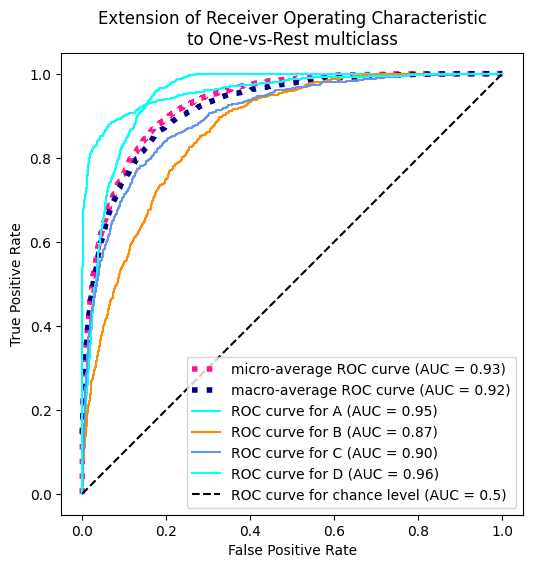

In [33]:
#Plot ROC for all classes and mirco/macro avg
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_test_prob[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

# Binary Model

Create Binary model (good/ bad class scores). Also allows for Use of Shap.



In [34]:
#Define current classes in to binary classes
def class2(score):
    if score > 1:
        return 1
    else:
        return 0

In [35]:
#Check new binary classes
df['class2'] = df['class'].apply(class2)
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class2
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2,1
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2,1
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1,0
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1,0


In [36]:
#Creat X,y and train test split with binary classes
X2 = df.drop(['class', 'class2'], axis=1)

y2 = df[['class2']]


X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.30, random_state=46)

In [37]:
#Fit model (Catboost)
model2 = CatBoostClassifier(verbose=False)
model2.fit(X_train2, y_train2)

In [38]:
#Gather and display scores for model
y_test_pred2 = model2.predict(X_test2)
y_test_prob2 = model2.predict_proba(X_test2)[:, 1]


#y_test_prob2 = y_test_prob2.reshape(-1)

print(metrics.classification_report(y_test2, y_test_pred2, digits=3))
print('Accuracy score: ', accuracy_score(y_test2, y_test_pred2))
print('Roc auc score : ', roc_auc_score(y_test2, y_test_prob2))

              precision    recall  f1-score   support

           0      0.861     0.930     0.894      2047
           1      0.920     0.844     0.881      1970

    accuracy                          0.888      4017
   macro avg      0.891     0.887     0.887      4017
weighted avg      0.890     0.888     0.887      4017

Accuracy score:  0.8877271595718198
Roc auc score :  0.9482875769666641


In [39]:
#Create confusion matrix for binary model
confusion2 = confusion_matrix(y_test2, y_test_pred2)

fig = px.imshow(confusion2, labels=dict(x="Predicted Value", y="Actual Vlaue"), x=[1,2],y=[1,2],text_auto=True, title='Confusion Matrix')
fig.update_layout(title_x=0.5)
fig.show()

In [40]:
#Plot ROC curve for binary model
fpr, tpr, thresholds = roc_curve(y_test2, y_test_prob2)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

# Feature Analysis

In [41]:
#List correlations
correlations = df.corr()['class'].sort_values()
correlations = pd.DataFrame(correlations)
correlations = correlations.drop('class2')
correlations

,class
sit and bend forward_cm,-0.587928
sit-ups counts,-0.452932
broad jump_cm,-0.262453
gripForce,-0.136775
systolic,0.035283
height_cm,0.036760
age,0.065969
diastolic,0.066728
gender,0.075287
weight_kg,0.212937


In [42]:
#Dwonload for use in other programs
#from google.colab import files
#correlations.to_csv('body performance correlations.csv')
#files.download("body performance correlations.csv")

In [43]:
#Create list for cat features
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [44]:
#Create feature importance
featurep = model.get_feature_importance(prettified=True)

featurep

,Feature Id,Importances
0,sit and bend forward_cm,25.394469
1,sit-ups counts,16.553768
2,age,13.017284
3,body fat_%,8.784034
4,weight_kg,7.824527
5,gripForce,7.535285
6,broad jump_cm,6.266362
7,height_cm,5.008827
8,systolic,3.634638
9,diastolic,3.130903


In [45]:
#Download for use on other programs
#from google.colab import files
#featurep.to_csv('body performance featurep.csv')
#files.download("body performance featurep.csv")

In [46]:
#Plot featrue importance
import plotly.express as px
fig = px.bar(featurep, x='Importances', y='Feature Id', title="Feature Importances on Class")
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()

It can be seen that sit and bend forward performance had the biggest impact on class performance, followed by sit up count and age.

In [47]:
#Create explainer and shap values from model
explainer = shap.Explainer(model2)
shap_values = explainer(X_test2)

/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:375: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



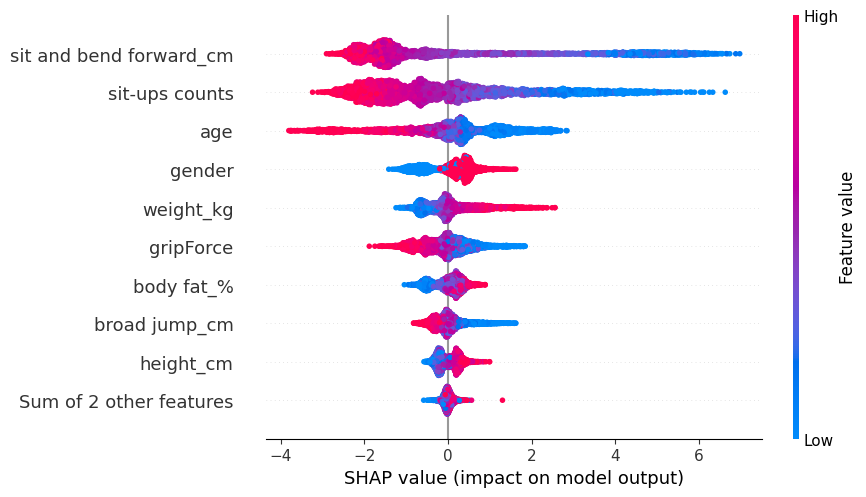

In [48]:
#Plot shap beesworm
shap.plots.beeswarm(shap_values)

The beeswarm plot above shows us the direction and impact of each feature. Both sit and bend forward and sit-up count the highest impact. The bulk of the impact can be seen to be around the shap value of -2. This means that a higher sit-ups coutn and sit and bend forward score will have a large positive impact on the score of the participant. It can be seen that once these scores are low the negative impact flattens out and doesnt seem to effect the score too much.

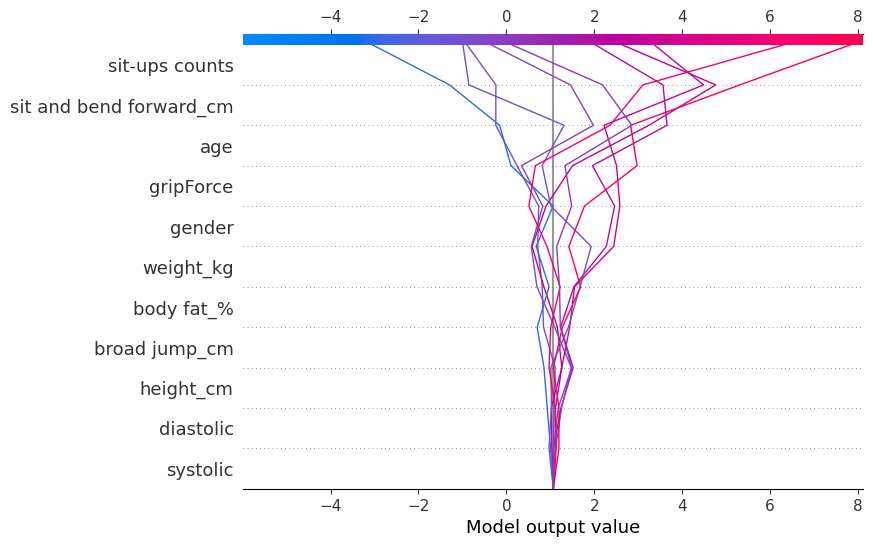

In [49]:
#Plot shap decision tree
expected_values = explainer.expected_value
shap_array = explainer.shap_values(X_test2)

shap.decision_plot(expected_values, shap_array[0:10],feature_names=list(X.columns))

Commentary

In [50]:
#List values to use as shap waterfall plot exapmples
shapdf = pd.DataFrame(shap_values.data[0:5], columns=X.columns)
shapdf.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,38.0,1.0,171.5,66.3,19.4,85.0,150.0,47.2,10.9,42.0,214.0
1,22.0,1.0,177.9,81.2,21.5,93.0,132.0,44.1,11.5,48.0,249.0
2,22.0,1.0,175.4,64.1,17.0,88.0,134.0,31.1,9.7,60.0,211.0
3,22.0,1.0,177.1,71.7,16.8,91.0,135.0,44.1,13.3,50.0,245.0
4,39.0,1.0,177.7,81.8,20.1,86.0,151.0,40.6,9.0,50.0,184.0


In [51]:
#Get pridicton 1
pred1 = shapdf.iloc[0]
prediction1 = model2.predict(pred1)
print(prediction1)

0


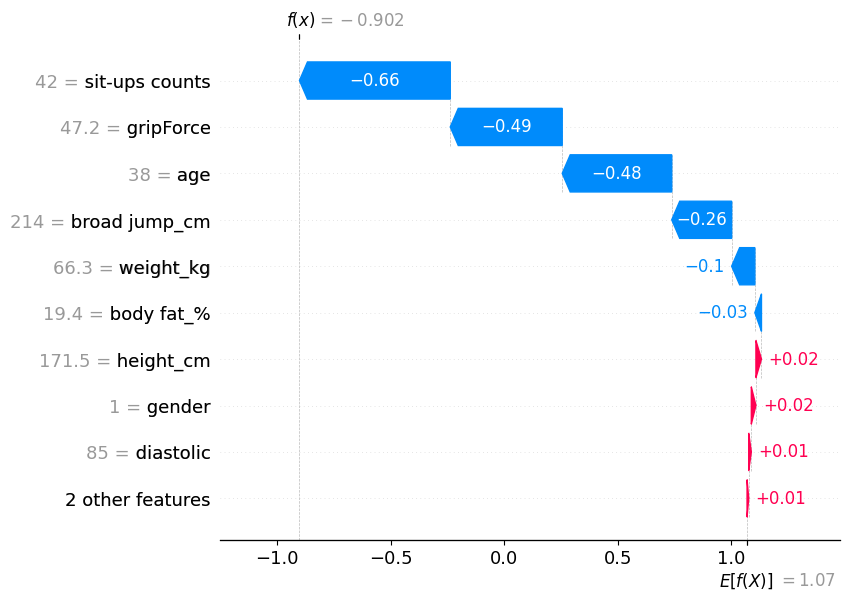

In [64]:
#Create shap waterfall plot for low performing participant

shap.plots.waterfall(shap_values[0])

The shap waterfall plot for this particpant shows that they were quite average in most features with not much pull either direction, except for thier age, grip force and sit-ups count which brought them towards a positive score. This shows that these were the main features in this particpants performance which led them to a 'good' score (0 which is eqaults to A or B).

In [53]:
#Get prediction 2
pred2 = shapdf.iloc[4]
prediction2 = model2.predict(pred2)
print(prediction2)

1


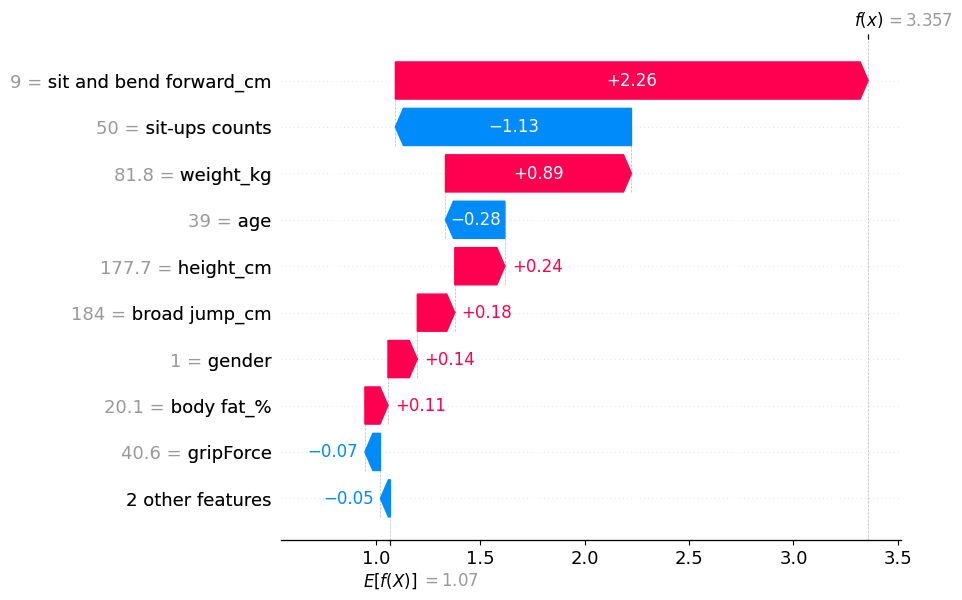

In [54]:
#Create shap waterfall plot with high performing participant
shap.plots.waterfall(shap_values[4])

The shap waterfall plot for the particpant above showed that the main features which affected their performance was weight, sit-ups count and sit and bend forward. Their sit-ups count brought them towards a positive score while thier wieght and sit and bent forward performance brought them towards a negative score, ultimately outwireghing any positive feature performances, resulting in a 'bad'score (1 = C or D).

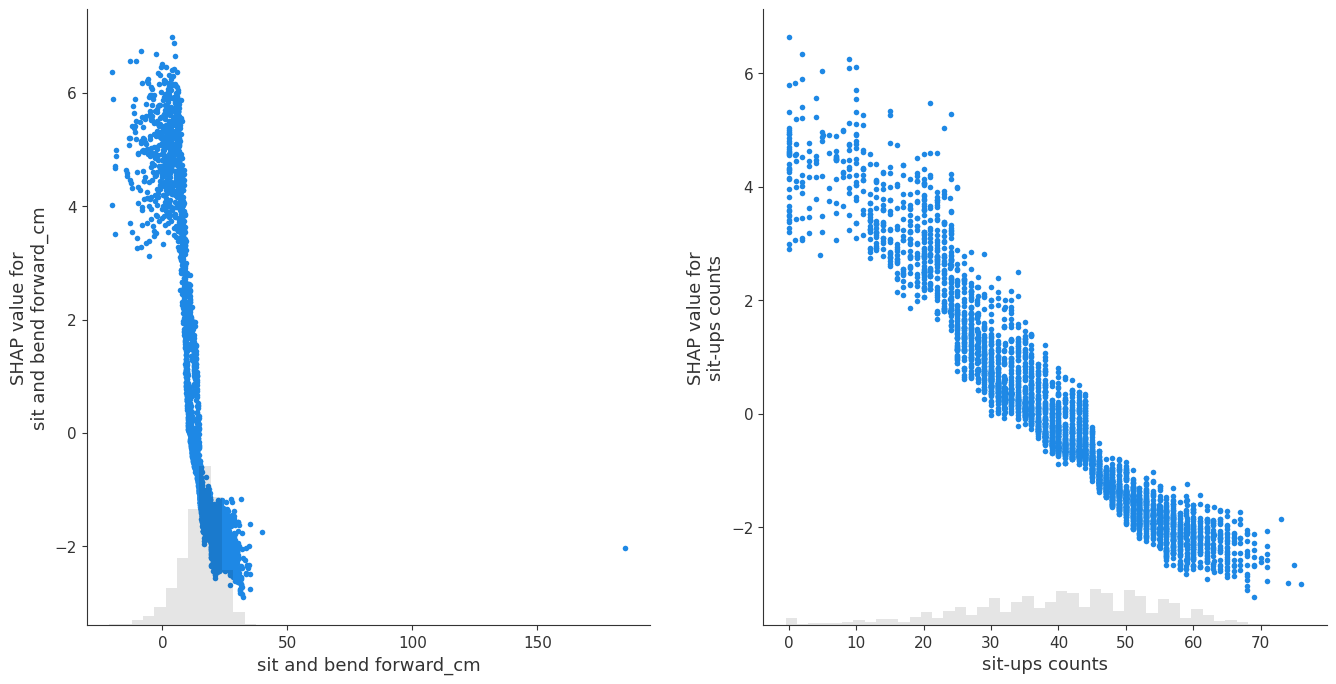

In [79]:
#Create shap scatterplots for important features
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(16,8))

#SHAP scatter plots
shap.plots.scatter(shap_values[:,"sit and bend forward_cm"],ax=ax[0],show=False)
shap.plots.scatter(shap_values[:,"sit-ups counts"],ax=ax[1])


Commentary

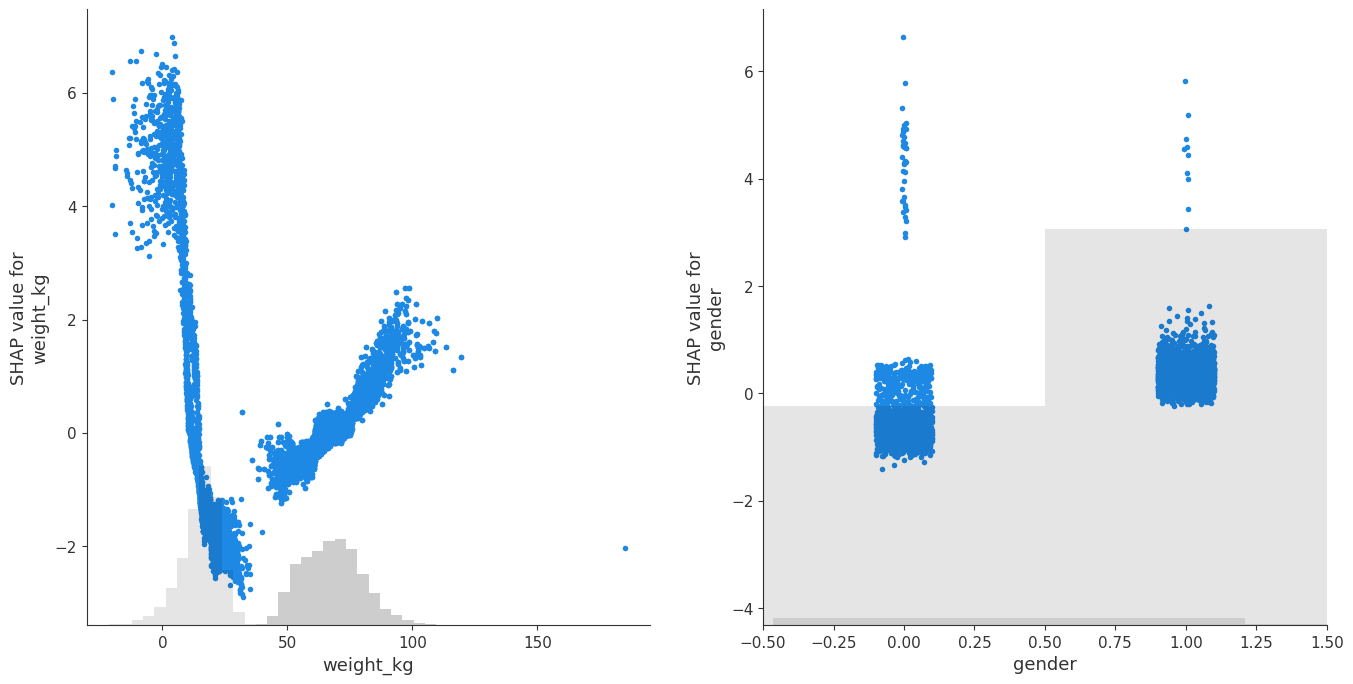

In [83]:
shap.plots.scatter(shap_values[:,"weight_kg"],ax=ax[0],show=False)
shap.plots.scatter(shap_values[:,"gender"],ax=ax[1])


Commentary

# Feature Selection

In [57]:
#Create model with highest immportance features selected
Xf = df[['sit and bend forward_cm', 'sit-ups counts', 'age', 'body fat_%', 'gender']]

yf = df[['class']]

In [58]:
X_trainf, X_testf, y_trainf, y_testf = train_test_split(Xf, yf, test_size=0.30, random_state=46)

In [59]:
modelf = CatBoostClassifier(verbose=False)
modelf.fit(X_trainf, y_trainf)

In [60]:
#Display results of feature selection
y_test_predf = modelf.predict(X_testf)
y_test_probf = modelf.predict_proba(X_testf)

print(metrics.classification_report(y_testf, y_test_predf, digits=3))
print('Accuracy score: ', accuracy_score(y_testf, y_test_predf))
print('Roc auc score : ', roc_auc_score(y_testf, y_test_probf, multi_class='ovr'))

              precision    recall  f1-score   support

           0      0.684     0.859     0.761      1005
           1      0.627     0.586     0.606      1042
           2      0.721     0.656     0.687      1005
           3      0.897     0.805     0.849       965

    accuracy                          0.724      4017
   macro avg      0.732     0.726     0.726      4017
weighted avg      0.730     0.724     0.723      4017

Accuracy score:  0.7244212098581031
Roc auc score :  0.903556471819374


Commentary